<a href="https://colab.research.google.com/github/theemotionalcaretaker01/BDSC-Project/blob/main/Draft_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Breast Cancer Mortality Disparities between Non-Hispanic Black and White women
## Question: Which states /regions in the United States have the highest breast cancer mortality rates and do disparities by race differ by state?
###Our project aims to apply data science methods to large scale biomedical surveillance data to quantify and visualize inequities in cancer outcomes. We’re going to analyze datasets that contains the mortality rates of women in each of the states in the United States including their race and ethnicities.

#Steps:
*   From our datasets we read the data first
*   We merged the datasets to



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
aa_df=pd.read_csv("incidence_AA.csv")
nhw_df=pd.read_csv("incidence_NHW.csv")
nhw_df

,State,Age-Adjusted Rate,Case Count,Population
0,Puerto Rico,Data not presented,Data not presented,Data not presented
1,Nevada,118,6691,3752768
2,New Mexico,121.9,4242,2038921
3,Utah,123.7,7929,6371817
4,Mississippi,125.4,7410,4250487
5,Arkansas,126.3,9718,5527561
6,Oklahoma,126.5,11751,6736808
7,Arizona,126.8,20252,10058968
8,Alabama,127.6,14907,8378299
9,West Virginia,128,7629,4183254


In [ ]:
aa_df=aa_df.loc[~aa_df["Age-Adjusted Rate"].isna(),:]
nhw_df=nhw_df.loc[~nhw_df["Age-Adjusted Rate"].isna(),:]

In [ ]:
nhw_df.set_index("State")
combined_df=aa_df.loc[:,["State","Age-Adjusted Rate"]].join(nhw_df.loc[:,"Age-Adjusted Rate"],rsuffix="_nhw")

In [ ]:
combined_df

,State,Age-Adjusted Rate,Age-Adjusted Rate_nhw
0,Wyoming,Data not presented,Data not presented
1,Montana,Data not presented,118
2,South Dakota,Data not presented,121.9
3,Puerto Rico,Data not presented,123.7
4,Maine,73.7,125.4
5,Idaho,79.8,126.3
6,Utah,81.8,126.5
7,North Dakota,99.4,126.8
8,New Hampshire,101.9,127.6
9,Vermont,102.1,128


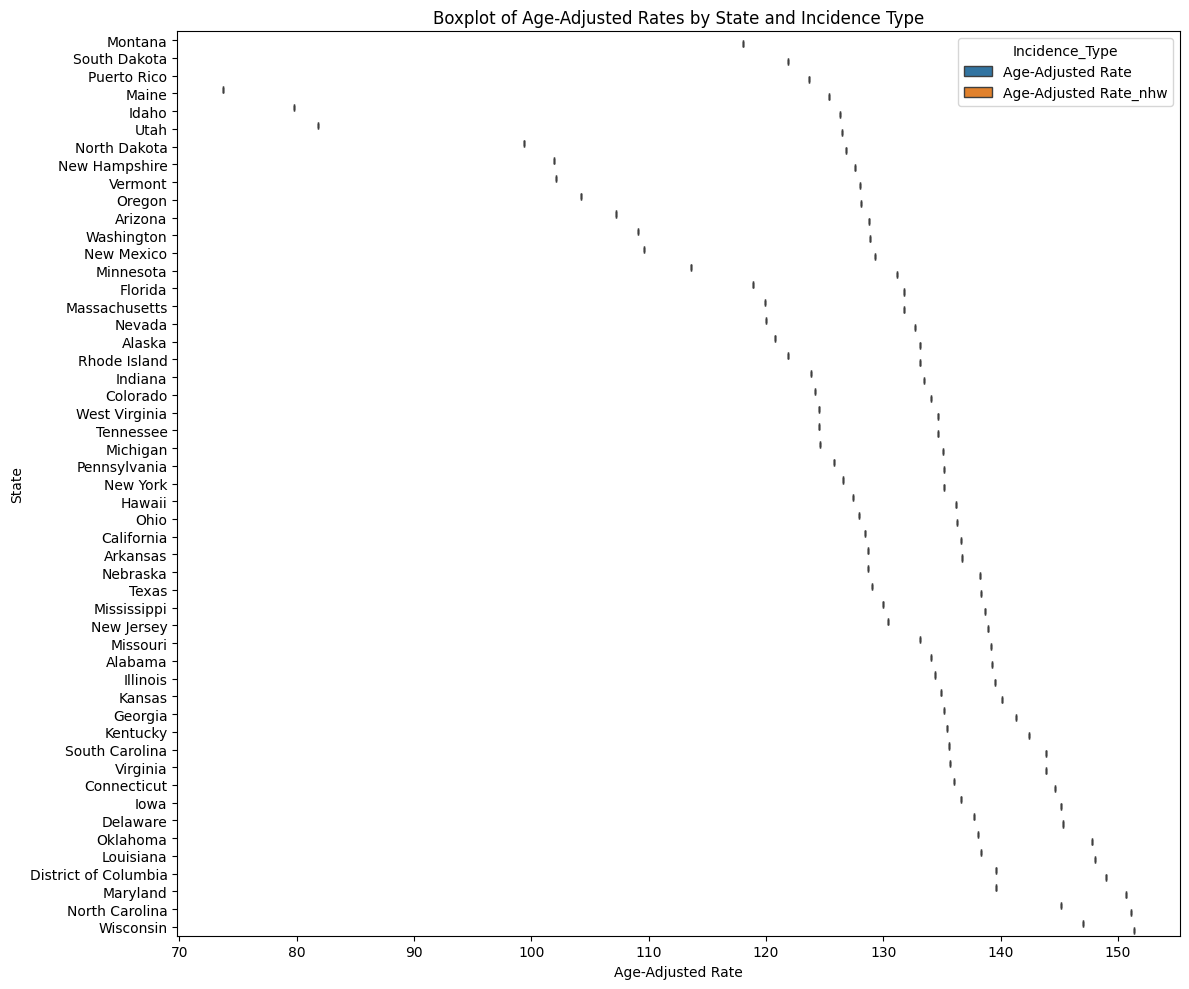

In [ ]:
# @title
combined_df_cleaned = combined_df.copy()
combined_df_cleaned['Age-Adjusted Rate'] = combined_df_cleaned['Age-Adjusted Rate'].replace('Data not presented', np.nan).astype(float)
combined_df_cleaned['Age-Adjusted Rate_nhw'] = combined_df_cleaned['Age-Adjusted Rate_nhw'].replace('Data not presented', np.nan).astype(float)

# Drop rows where both incidence rates are NaN
combined_df_cleaned = combined_df_cleaned.dropna(subset=['Age-Adjusted Rate', 'Age-Adjusted Rate_nhw'], how='all')

# Melt the dataframe for boxplot
melted_df = combined_df_cleaned.melt(id_vars=['State'],
                                       value_vars=['Age-Adjusted Rate', 'Age-Adjusted Rate_nhw'],
                                       var_name='Incidence_Type',
                                       value_name='Rate')

plt.figure(figsize=(12, 10))
sns.boxplot(data=melted_df, x='Rate', y='State', hue='Incidence_Type')
plt.title('Boxplot of Age-Adjusted Rates by State and Incidence Type')
plt.xlabel('Age-Adjusted Rate')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(combined_df.iloc[0:40,1:3].values.astype(np.float32))

NameError: name 'sns' is not defined

In [ ]:
import pandas as pd
import numpy as np

# --- Load your two files (change paths) ---
white_path = "mortality_nhw.csv"
black_path = "mortality_aa.csv"

w = pd.read_csv(white_path)
b = pd.read_csv(black_path)

# --- Standardize column names (strip spaces) ---
w.columns = w.columns.str.strip()
b.columns = b.columns.str.strip()

# --- Keep only needed columns and rename to race-specific ---
w = w[["State", "Age-Adjusted Rate", "Death Count", "Population"]].copy()
b = b[["State", "Age-Adjusted Rate", "Death Count", "Population"]].copy()

#Age-adjusted mortality rate is used to compare death rates between populations
# with different age structures

w = w.rename(columns={
    "Age-Adjusted Rate": "mort_age_adj_nhw",
    "Death Count": "mort_deaths_nhw",
    "Population": "mort_pop_nhw"
})

b = b.rename(columns={
    "Age-Adjusted Rate": "mort_age_adj_aa",
    "Death Count": "mort_deaths_aa",
    "Population": "mort_pop_aa"
})

# --- Clean state names ---
def clean_state_names(df):
    df = df.copy()
    df["State"] = (df["State"].astype(str)
                   .str.strip()
                   .str.replace(r"\s+", " ", regex=True))
    return df

w = clean_state_names(w)
b = clean_state_names(b)

# --- Build master list (50 states + DC; optionally include Puerto Rico) ---
ALL_STATES = [
    "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware",
    "District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa",
    "Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota",
    "Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico",
    "New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
    "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington",
    "West Virginia","Wisconsin","Wyoming", "Puerto Rico"
]
states = pd.DataFrame({"State": ALL_STATES})

# --- Merge so we keep states even with no data ---
mort = (states
        .merge(w, on="State", how="left")
        .merge(b, on="State", how="left"))

# --- Convert columns to numeric (turns "Data not presented" into NaN) ---
num_cols = [
    "mort_age_adj_nhw","mort_deaths_nhw","mort_pop_nhw",
    "mort_age_adj_aa","mort_deaths_aa","mort_pop_aa"
]
for c in num_cols:
    mort[c] = pd.to_numeric(mort[c], errors="coerce")

# --- Add disparity metrics ---
mort["abs_gap_black_minus_white"] = mort["mort_age_adj_aa"] - mort["mort_age_adj_nhw"]
mort["ratio_black_over_white"] = mort["mort_age_adj_aa"] / mort["mort_age_adj_nhw"]

mort.head(10)

,State,mort_age_adj_nhw,mort_deaths_nhw,mort_pop_nhw,mort_age_adj_aa,mort_deaths_aa,mort_pop_aa,abs_gap_black_minus_white,ratio_black_over_white
0,Alabama,18.9,2440.0,8276704.0,26.9,1078.0,3549958.0,8.0,1.423280
1,Alaska,17.7,230.0,1017803.0,NaN,NaN,NaN,NaN,NaN
2,Arizona,19.1,3473.0,9951873.0,29.2,224.0,833506.0,10.1,1.528796
3,Arkansas,19.6,1631.0,5456963.0,27.5,343.0,1222881.0,7.9,1.403061
4,California,21.2,12813.0,34490275.0,29.4,1995.0,5502755.0,8.2,1.386792
5,Colorado,19.2,2673.0,9640289.0,24.0,127.0,549558.0,4.8,1.250000
6,Connecticut,17.0,1812.0,5909699.0,24.2,270.0,995047.0,7.2,1.423529
7,Delaware,21.5,602.0,1555639.0,28.5,189.0,592529.0,7.0,1.325581
8,District of Columbia,15.1,89.0,636754.0,30.7,326.0,812418.0,15.6,2.033113
9,Florida,19.0,10653.0,29367130.0,25.7,2418.0,8829689.0,6.7,1.352632


In [ ]:
state_to_abbrev = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO",
    "Connecticut":"CT","Delaware":"DE","District of Columbia":"DC","Florida":"FL","Georgia":"GA",
    "Hawaii":"HI","Idaho":"ID","Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY",
    "Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN",
    "Mississippi":"MS","Missouri":"MO","Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH",
    "New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH",
    "Oklahoma":"OK","Oregon":"OR","Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD",
    "Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA",
    "West Virginia":"WV","Wisconsin":"WI","Wyoming":"WY",
    # locationmode="USA-states" does not include Puerto Rice
    "Puerto Rico":"PR"
}

mort["abbr"] = mort["State"].map(state_to_abbrev)

import plotly.express as px

# (Optional) filter out PR for the map since Plotly USA-states won't render it cleanly
mort_for_map = mort[mort["State"] != "Puerto Rico"].copy()

fig = px.choropleth(
    mort_for_map,
    locations="abbr",
    locationmode="USA-states",
    color="mort_age_adj_aa",
    scope="usa",
    title="Breast Cancer Mortality (Age-adjusted) — Non-Hispanic Black Women"
)
fig.show()

fig = px.choropleth(
    mort_for_map,
    locations="abbr",
    locationmode="USA-states",
    color="abs_gap_black_minus_nhw",
    scope="usa",
    title="Mortality Disparity (Black − White), Age-adjusted"
)
fig.show()


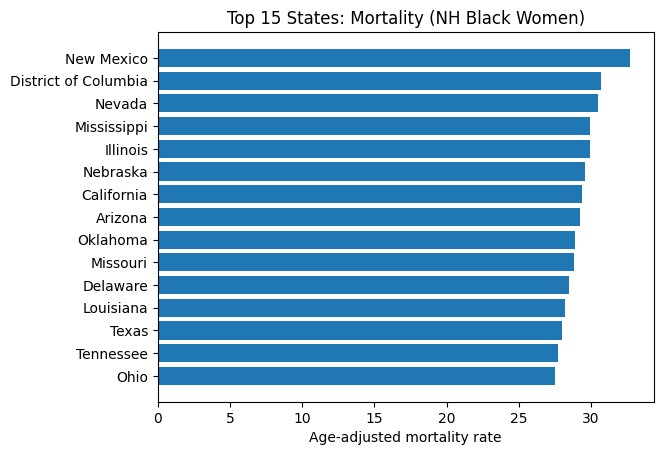

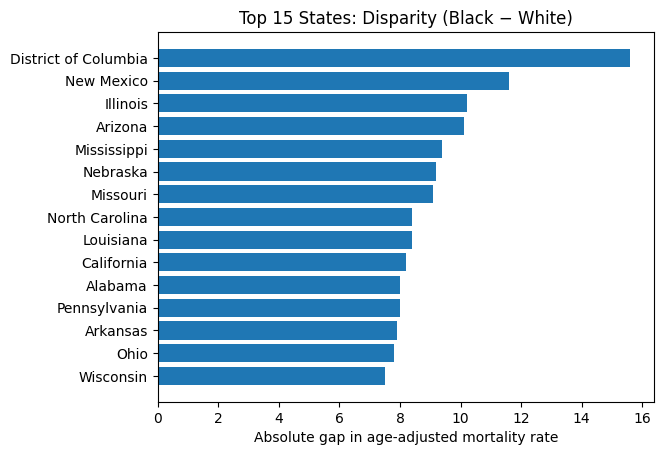

In [ ]:
import matplotlib.pyplot as plt

top_n = 15

df = mort.dropna(subset=["mort_age_adj_aa"]).sort_values("mort_age_adj_aa", ascending=False).head(top_n)

plt.figure()
plt.barh(df["State"], df["mort_age_adj_aa"])
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} States: Mortality (NH Black Women)")
plt.xlabel("Age-adjusted mortality rate")
plt.show()

df_gap = mort.dropna(subset=["abs_gap_black_minus_white"]).sort_values("abs_gap_black_minus_white", ascending=False).head(top_n)

plt.figure()
plt.barh(df_gap["State"], df_gap["abs_gap_black_minus_white"])
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} States: Disparity (Black − White)")
plt.xlabel("Absolute gap in age-adjusted mortality rate")
plt.show()


In [ ]:
inc_white_path = "incidence_nhw.csv"
inc_black_path = "incidence_aa.csv"

iw = pd.read_csv(inc_white_path)
ib = pd.read_csv(inc_black_path)

iw.columns = iw.columns.str.strip()
ib.columns = ib.columns.str.strip()

iw = iw[["State", "Age-Adjusted Rate"]].copy().rename(columns={"Age-Adjusted Rate":"inc_age_adj_nhw"})
ib = ib[["State", "Age-Adjusted Rate"]].copy().rename(columns={"Age-Adjusted Rate":"inc_age_adj_aa"})

iw = clean_state_names(iw)
ib = clean_state_names(ib)

inc = (states
       .merge(iw, on="State", how="left")
       .merge(ib, on="State", how="left"))

inc["inc_age_adj_nhw"] = pd.to_numeric(inc["inc_age_adj_nhw"], errors="coerce")
inc["inc_age_adj_aa"] = pd.to_numeric(inc["inc_age_adj_aa"], errors="coerce")

# Combine into one master table (mortality + incidence)
full = mort.merge(inc, on="State", how="left")
full.head()


,State,mort_age_adj_nhw,mort_deaths_nhw,mort_pop_nhw,mort_age_adj_aa,mort_deaths_aa,mort_pop_aa,abs_gap_black_minus_white,ratio_black_over_white,abbr,inc_age_adj_nhw,inc_age_adj_aa
0,Alabama,18.9,2440.0,8276704.0,26.9,1078.0,3549958.0,8.0,1.423280,AL,127.6,134.1
1,Alaska,17.7,230.0,1017803.0,NaN,NaN,NaN,NaN,NaN,AK,128.9,120.8
2,Arizona,19.1,3473.0,9951873.0,29.2,224.0,833506.0,10.1,1.528796,AZ,126.8,107.2
3,Arkansas,19.6,1631.0,5456963.0,27.5,343.0,1222881.0,7.9,1.403061,AR,126.3,128.7
4,California,21.2,12813.0,34490275.0,29.4,1995.0,5502755.0,8.2,1.386792,CA,140.1,128.4


In [ ]:
state_to_abbrev = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO",
    "Connecticut":"CT","Delaware":"DE","District of Columbia":"DC","Florida":"FL","Georgia":"GA",
    "Hawaii":"HI","Idaho":"ID","Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY",
    "Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN",
    "Mississippi":"MS","Missouri":"MO","Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH",
    "New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH",
    "Oklahoma":"OK","Oregon":"OR","Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD",
    "Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA",
    "West Virginia":"WV","Wisconsin":"WI","Wyoming":"WY",
    # locationmode="USA-states" does not include Puerto Rice
    "Puerto Rico":"PR"
}

# Add 'abbr' to the full DataFrame for mapping
full["abbr"] = full["State"].map(state_to_abbrev)

import plotly.express as px

# (Optional) filter out PR for the map since Plotly USA-states won't render it cleanly
full_for_map = full[full["State"] != "Puerto Rico"].copy()

fig = px.choropleth(
    full_for_map, # Use full_for_map for incidence data
    locations="abbr",
    locationmode="USA-states",
    color="inc_age_adj_aa",
    scope="usa",
    title="Breast Cancer Incidence (Age-adjusted) — Non-Hispanic Black Women"
)
fig.show()

fig = px.choropleth(
    full_for_map, # Use full_for_map for incidence data
    locations="abbr",
    locationmode="USA-states",
    color="abs_gap_black_minus_white", # Corrected column name
    scope="usa",
    title="Incidence Disparity (Black − White), Age-adjusted"
)
fig.show()

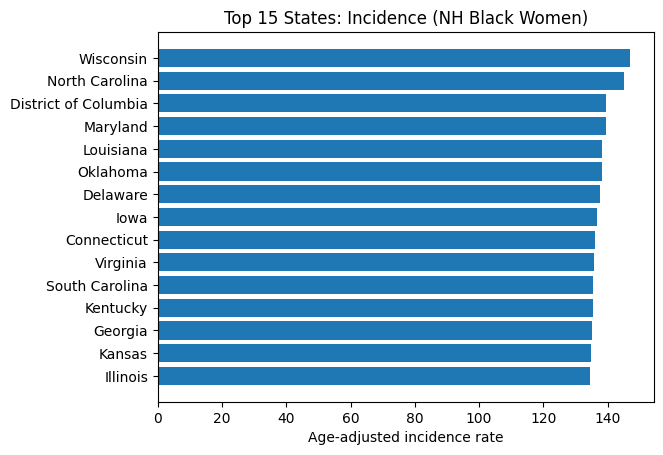

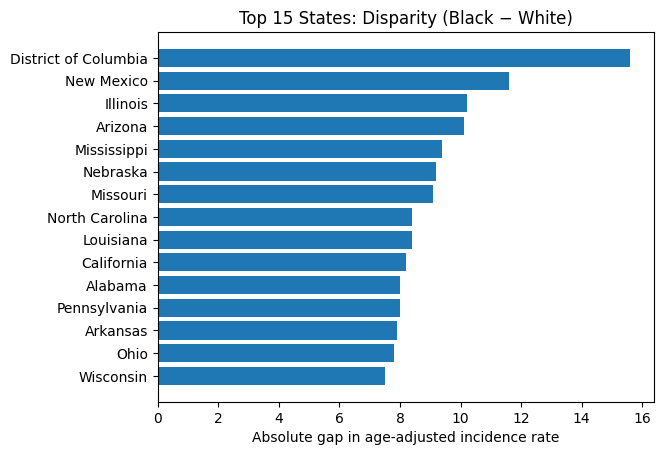

In [ ]:
import matplotlib.pyplot as plt

top_n = 15

df = full.dropna(subset=["inc_age_adj_aa"]).sort_values("inc_age_adj_aa", ascending=False).head(top_n)

plt.figure()
plt.barh(df["State"], df["inc_age_adj_aa"])
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} States: Incidence (NH Black Women)")
plt.xlabel("Age-adjusted incidence rate")
plt.show()

df_gap = full.dropna(subset=["abs_gap_black_minus_white"]).sort_values("abs_gap_black_minus_white", ascending=False).head(top_n)

plt.figure()
plt.barh(df_gap["State"], df_gap["abs_gap_black_minus_white"])
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} States: Disparity (Black − White)")
plt.xlabel("Absolute gap in age-adjusted incidence rate")
plt.show()

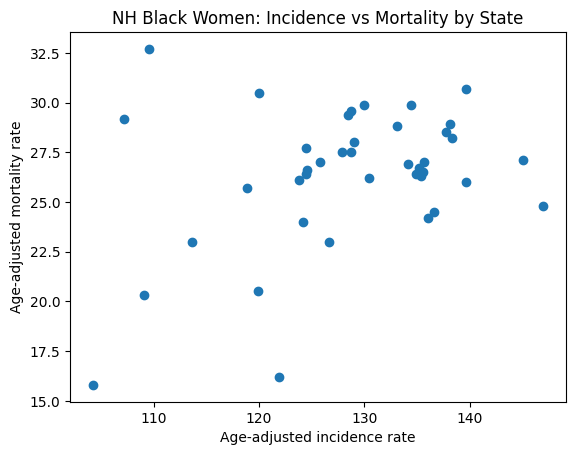

In [ ]:
plt.figure()
plt.scatter(full["inc_age_adj_aa"], full["mort_age_adj_aa"])
plt.title("NH Black Women: Incidence vs Mortality by State")
plt.xlabel("Age-adjusted incidence rate")
plt.ylabel("Age-adjusted mortality rate")
plt.show()


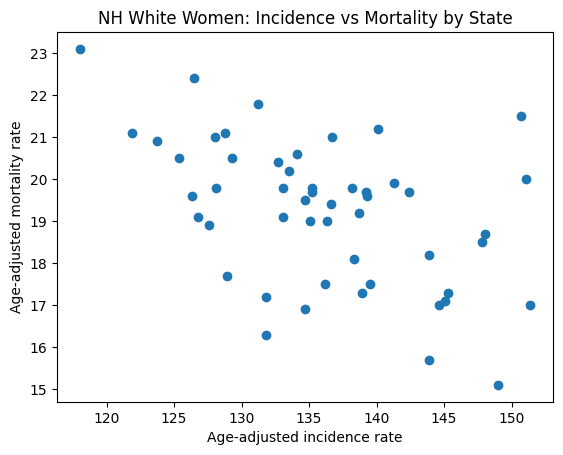

In [ ]:
plt.figure()
plt.scatter(full["inc_age_adj_nhw"], full["mort_age_adj_nhw"])
plt.title("NH White Women: Incidence vs Mortality by State")
plt.xlabel("Age-adjusted incidence rate")
plt.ylabel("Age-adjusted mortality rate")
plt.show()


-----------------------------------------------
BREAST CANCER MORTALITY DISPARITIES ANALYSIS
Team: Zoe Migioni, Chimbusonma Amaechina
-----------------------------------------------

White women mortality data shape: (52, 4)

Black women mortality data shape: (52, 4)

Sample of White women data:
                  State   Age-Adjusted Rate         Death Count  \
0           Puerto Rico  Data not presented  Data not presented   
1  District of Columbia                15.1                  89   
2         Massachusetts                15.7                3242   
3          North Dakota                16.3                 360   
4          South Dakota                16.9                 463   

           Population  
0  Data not presented  
1              636754  
2            12518052  
3             1581259  
4             1801776  

Sample of Black women data:
     State   Age-Adjusted Rate         Death Count          Population
0   Alaska  Data not presented  Data not presented  Data

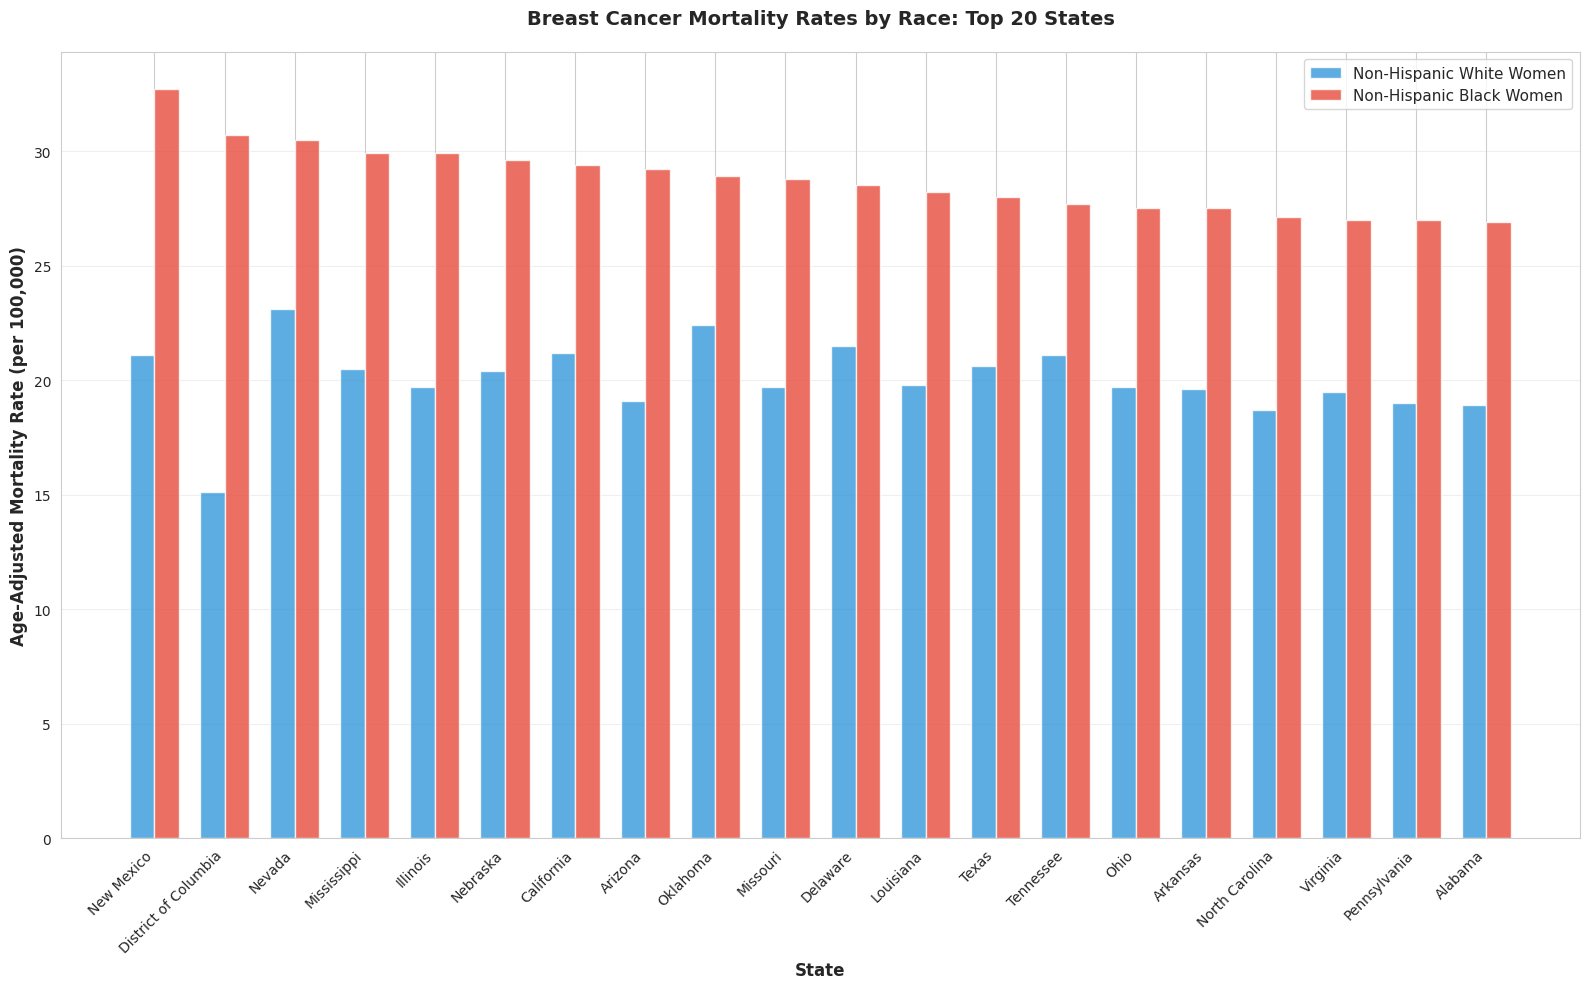

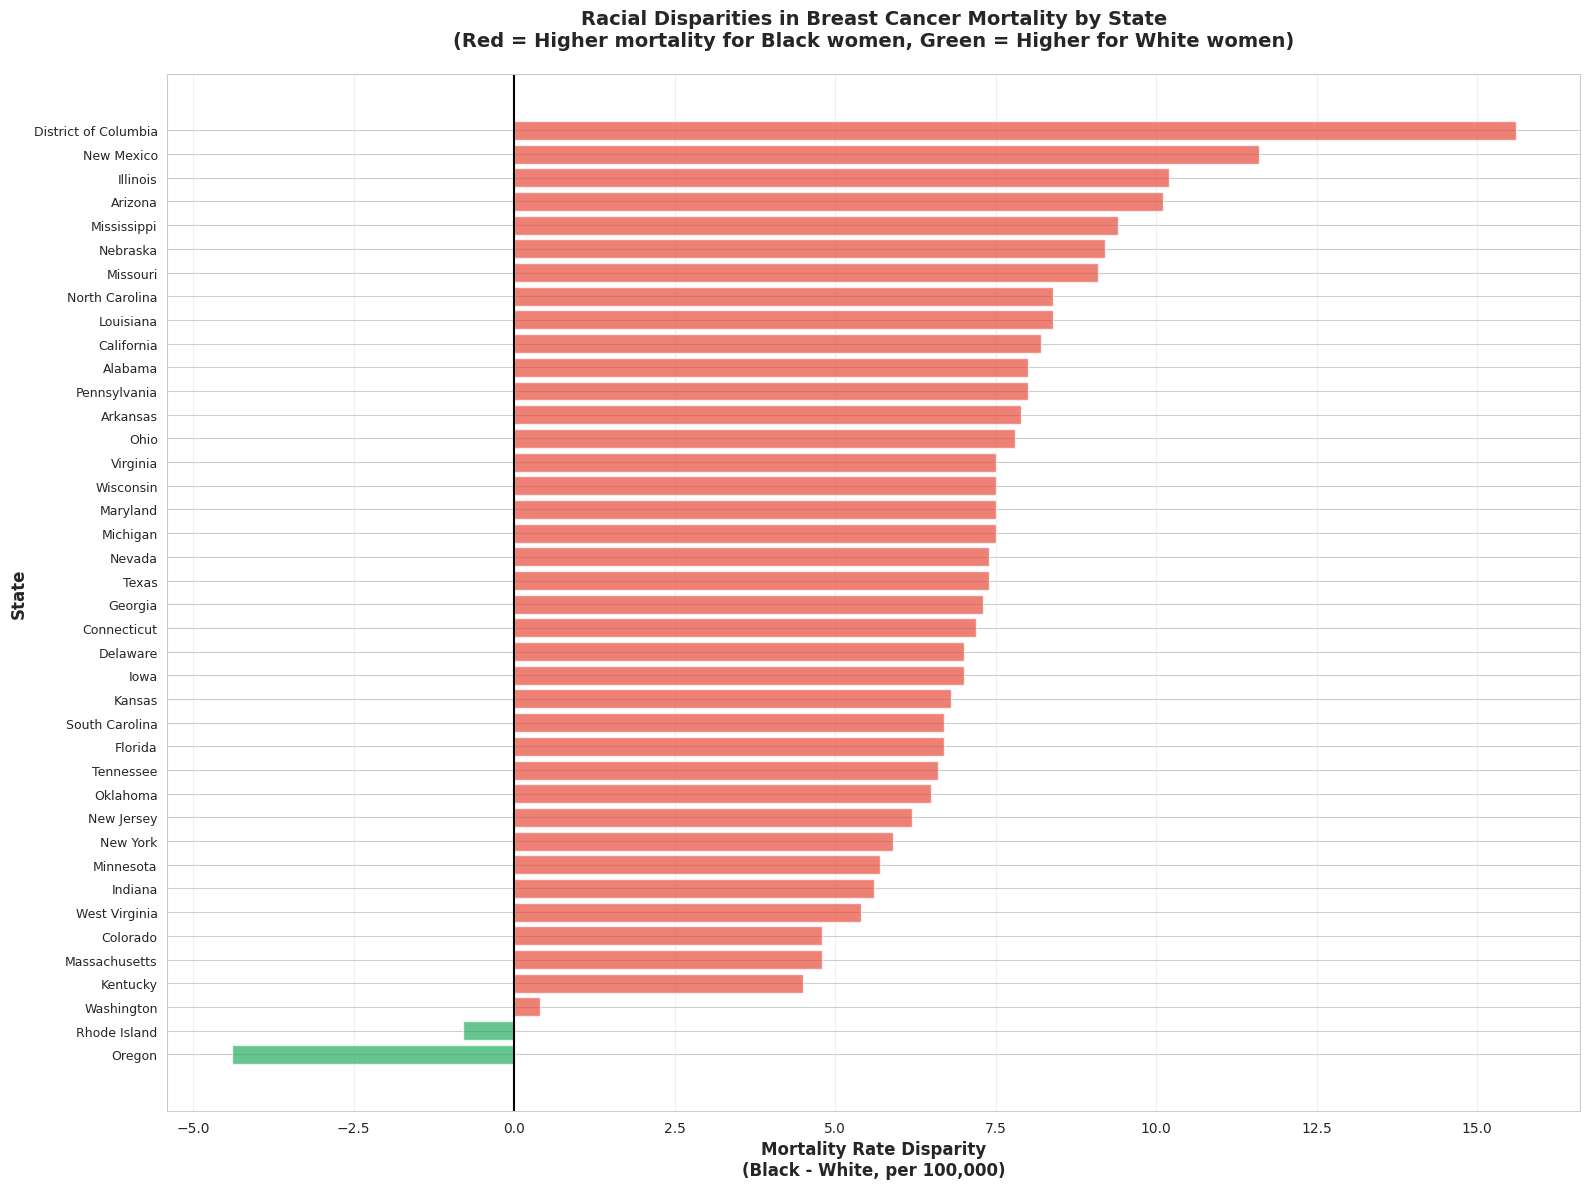

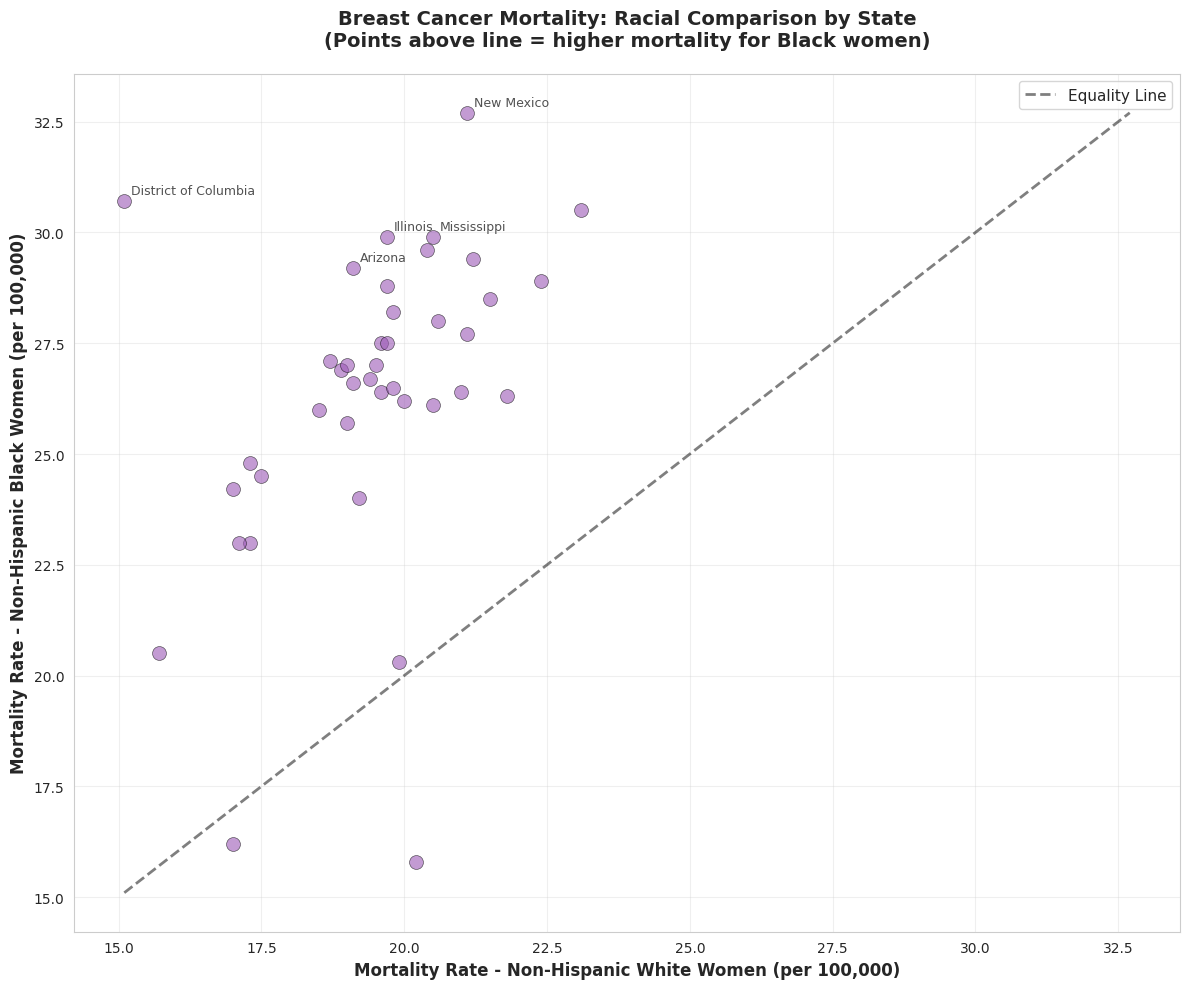

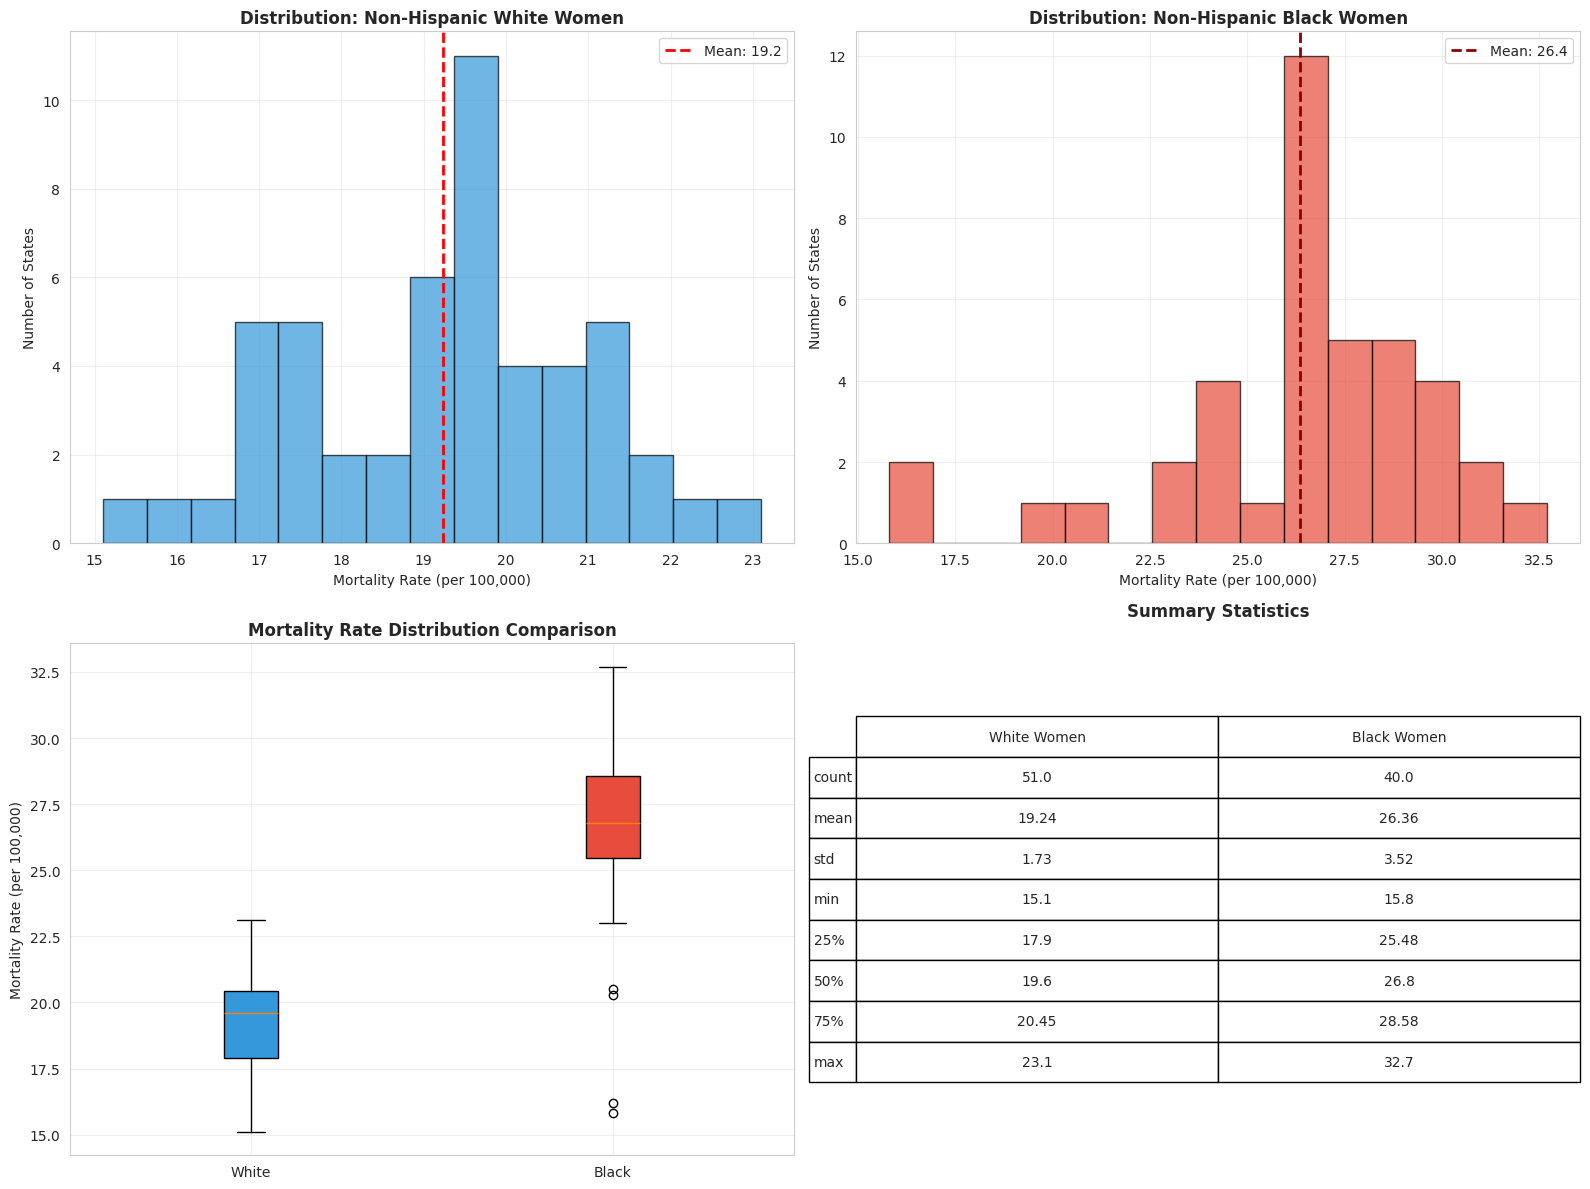


 Data Coverage:
   • Total states/territories in dataset: 52
   • States with data for both races: 51
   • States with non-Hispanic White women data: 51
   • States with non_Hispanic Black women data: 40

 Average mortality rates (states with both races):
   • Non-Hispanic White women: 19.44 per 100,000
   • Non-Hispanic Black women: 26.35 per 100,000
   • Overall disparity: 6.91 per 100,000

 Top 5 states with highest disparities (Black - White):
   • District of Columbia: Black 30.7 vs White 15.1 = +15.6 per 100,000 (2.03x)
   • New Mexico: Black 32.7 vs White 21.1 = +11.6 per 100,000 (1.55x)
   • Illinois: Black 29.9 vs White 19.7 = +10.2 per 100,000 (1.52x)
   • Arizona: Black 29.2 vs White 19.1 = +10.1 per 100,000 (1.53x)
   • Mississippi: Black 29.9 vs White 20.5 = +9.4 per 100,000 (1.46x)

 Top 5 states with lowest/reverse disparities:
   • Oregon: -4.4 per 100,000 (White women higher)
   • Rhode Island: -0.8 per 100,000 (White women higher)
   • Washington: +0.4 per 100,000
  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("-----------------------------------------------")
print("BREAST CANCER MORTALITY DISPARITIES ANALYSIS")
print("Team: Zoe Migioni, Chimbusonma Amaechina")
print("-----------------------------------------------")

# Load mortality data for both races
# Replace these file paths with your actual CSV file names

mortality_white = pd.read_csv('mortality_nhw.csv')
mortality_black = pd.read_csv('mortality_aa.csv')

print(f"\nWhite women mortality data shape: {mortality_white.shape}")
print(f"\nBlack women mortality data shape: {mortality_black.shape}")

print("\nSample of White women data:")
print(mortality_white.head())
print("\nSample of Black women data:")
print(mortality_black.head())


# Function to clean the data
def clean_mortality_data(df, race_suffix):
    """Clean mortality data and handle missing values"""
    df_clean = df.copy()

    # Replace "Data not presented" with NaN
    df_clean = df_clean.replace('Data not presented', np.nan)
    df_clean = df_clean.replace('Data not pres', np.nan)

    # Convert Age-Adjusted Rate to numeric
    df_clean['Age-Adjusted Rate'] = pd.to_numeric(
        df_clean['Age-Adjusted Rate'], errors='coerce'
    )

    # Convert Death Count to numeric
    df_clean['Death Count'] = pd.to_numeric(df_clean['Death Count'], errors='coerce')

    # Convert Population to numeric
    df_clean['Population'] = pd.to_numeric(df_clean['Population'], errors='coerce')

    # Rename columns to include race
    df_clean = df_clean.rename(columns={
        'Age-Adjusted Rate': f'Mortality_Rate_{race_suffix}',
        'Death Count': f'Death_Count_{race_suffix}',
        'Population': f'Population_{race_suffix}'
    })

    return df_clean

# Clean both datasets
mortality_white_clean = clean_mortality_data(mortality_white, 'NHW')
mortality_black_clean = clean_mortality_data(mortality_black, 'AA')

print(f"Cleaned White women data: {mortality_white_clean['Mortality_Rate_NHW'].notna().sum()} states with data")
print(f"Cleaned Black women data: {mortality_black_clean['Mortality_Rate_AA'].notna().sum()} states with data")



# Merge on State (outer join to keep all states even with missing data)
mortality_combined = pd.merge(
    mortality_white_clean[['State', 'Mortality_Rate_NHW', 'Death_Count_NHW', 'Population_NHW']],
    mortality_black_clean[['State', 'Mortality_Rate_AA', 'Death_Count_AA', 'Population_AA']],
    on='State',
    how='outer'
)

# Calculate disparity (difference between rates)
mortality_combined['Disparity_Absolute'] = (
    mortality_combined['Mortality_Rate_AA'] - mortality_combined['Mortality_Rate_NHW']
)

# Calculate disparity ratio (Black rate / White rate)
mortality_combined['Disparity_Ratio'] = (
    mortality_combined['Mortality_Rate_AA'] / mortality_combined['Mortality_Rate_NHW']
)

# Sort by state name
mortality_combined = mortality_combined.sort_values('State')

print(f"\nCombined mortality data shape: {mortality_combined.shape}")
print("\nSample of combined mortality data:")
print(mortality_combined.head(10))

# Check for states with data for both races
both_races = mortality_combined.dropna(subset=['Mortality_Rate_NHW', 'Mortality_Rate_AA'])
print(f"\nStates with data for both races: {len(both_races)}")

# Save combined mortality data
mortality_combined.to_csv('mortality_combined.csv', index=False)
print("\nCombined mortality data saved to 'mortality_combined.csv'")


print("INCIDENCE DATA ANALYSIS (For-Context)")

# Load incidence data for both races
try:
    incidence_white = pd.read_csv('incidence_nhw.csv')
    incidence_black = pd.read_csv('incidence_aa.csv')

    # Clean incidence data
    def clean_incidence_data(df, race_suffix):
        df_clean = df.copy()
        df_clean = df_clean.replace('Data not presented', np.nan)
        df_clean = df_clean.replace('Data not pres', np.nan)

        rate_col = [col for col in df_clean.columns if 'rate' in col.lower()][0]
        df_clean[rate_col] = pd.to_numeric(df_clean[rate_col], errors='coerce')
        df_clean = df_clean.rename(columns={rate_col: f'Incidence_Rate_{race_suffix}'})

        return df_clean

    incidence_white_clean = clean_incidence_data(incidence_white, 'White')
    incidence_black_clean = clean_incidence_data(incidence_black, 'Black')

    # Merge incidence data
    incidence_combined = pd.merge(
        incidence_white_clean[['State', 'Incidence_Rate_White']],
        incidence_black_clean[['State', 'Incidence_Rate_Black']],
        on='State',
        how='outer'
    )

    # Calculate incidence disparity
    incidence_combined['Incidence_Disparity'] = (
        incidence_combined['Incidence_Rate_Black'] - incidence_combined['Incidence_Rate_White']
    )

    incidence_combined.to_csv('incidence_combined.csv', index=False)

    has_incidence = True
except FileNotFoundError:
    print("Incidence data files not found.")
    has_incidence = False



# Remove any rows where both rates are missing
mortality_viz = mortality_combined.dropna(subset=['Mortality_Rate_NHW', 'Mortality_Rate_AA'], how='all')


fig, ax = plt.subplots(figsize=(16, 10))
mortality_sorted = mortality_viz.dropna(subset=['Mortality_Rate_AA']).sort_values('Mortality_Rate_AA', ascending=False).head(20)

x = np.arange(len(mortality_sorted))
width = 0.35

bars1 = ax.bar(x - width/2, mortality_sorted['Mortality_Rate_NHW'], width,
               label='Non-Hispanic White Women', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, mortality_sorted['Mortality_Rate_AA'], width,
               label='Non-Hispanic Black Women', color='#e74c3c', alpha=0.8)

ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('Age-Adjusted Mortality Rate (per 100,000)', fontsize=12, fontweight='bold')
ax.set_title('Breast Cancer Mortality Rates by Race: Top 20 States',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(mortality_sorted['State'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('mortality_comparison_top20.png', dpi=300, bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(16, 12))
disparity_sorted = mortality_viz.dropna(subset=['Disparity_Absolute']).sort_values('Disparity_Absolute', ascending=True)

colors = ['#e74c3c' if x > 0 else '#27ae60' for x in disparity_sorted['Disparity_Absolute']]
bars = ax.barh(range(len(disparity_sorted)), disparity_sorted['Disparity_Absolute'], color=colors, alpha=0.7)

ax.set_yticks(range(len(disparity_sorted)))
ax.set_yticklabels(disparity_sorted['State'], fontsize=9)
ax.set_xlabel('Mortality Rate Disparity\n(Black - White, per 100,000)', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.set_title('Racial Disparities in Breast Cancer Mortality by State\n(Red = Higher mortality for Black women, Green = Higher for White women)',
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('mortality_disparity.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(12, 10))
scatter_data = mortality_viz.dropna(subset=['Mortality_Rate_NHW', 'Mortality_Rate_AA'])

ax.scatter(scatter_data['Mortality_Rate_NHW'],
           scatter_data['Mortality_Rate_AA'],
           s=100, alpha=0.6, color='#9b59b6', edgecolors='black', linewidth=0.5)

# Add diagonal line (equality line)
max_rate = max(scatter_data['Mortality_Rate_NHW'].max(), scatter_data['Mortality_Rate_AA'].max())
min_rate = min(scatter_data['Mortality_Rate_NHW'].min(), scatter_data['Mortality_Rate_AA'].min())
ax.plot([min_rate, max_rate], [min_rate, max_rate], 'k--', alpha=0.5, linewidth=2, label='Equality Line')

# Label some notable states
top_disparity = scatter_data.nlargest(5, 'Disparity_Absolute')
for idx, row in top_disparity.iterrows():
    ax.annotate(row['State'],
                (row['Mortality_Rate_NHW'], row['Mortality_Rate_AA']),
                xytext=(5, 5), textcoords='offset points', fontsize=9, alpha=0.8)

ax.set_xlabel('Mortality Rate - Non-Hispanic White Women (per 100,000)', fontsize=12, fontweight='bold')
ax.set_ylabel('Mortality Rate - Non-Hispanic Black Women (per 100,000)', fontsize=12, fontweight='bold')
ax.set_title('Breast Cancer Mortality: Racial Comparison by State\n(Points above line = higher mortality for Black women)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('mortality_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram - White women
axes[0, 0].hist(mortality_viz['Mortality_Rate_NHW'].dropna(), bins=15,
                color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(mortality_viz['Mortality_Rate_NHW'].mean(), color='red',
                   linestyle='--', linewidth=2, label=f'Mean: {mortality_viz["Mortality_Rate_NHW"].mean():.1f}')
axes[0, 0].set_title('Distribution: Non-Hispanic White Women', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Mortality Rate (per 100,000)')
axes[0, 0].set_ylabel('Number of States')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histogram - Black women
axes[0, 1].hist(mortality_viz['Mortality_Rate_AA'].dropna(), bins=15,
                color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(mortality_viz['Mortality_Rate_AA'].mean(), color='darkred',
                   linestyle='--', linewidth=2, label=f'Mean: {mortality_viz["Mortality_Rate_AA"].mean():.1f}')
axes[0, 1].set_title('Distribution: Non-Hispanic Black Women', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Mortality Rate (per 100,000)')
axes[0, 1].set_ylabel('Number of States')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot comparison
data_for_box = [
    mortality_viz['Mortality_Rate_NHW'].dropna(),
    mortality_viz['Mortality_Rate_AA'].dropna()
]
bp = axes[1, 0].boxplot(data_for_box, labels=['White', 'Black'], patch_artist=True)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[1, 0].set_title('Mortality Rate Distribution Comparison', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Mortality Rate (per 100,000)')
axes[1, 0].grid(alpha=0.3)

# Summary statistics table
summary_stats = pd.DataFrame({
    'White Women': mortality_viz['Mortality_Rate_NHW'].describe(),
    'Black Women': mortality_viz['Mortality_Rate_AA'].describe()
}).round(2)

axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=summary_stats.values,
                          rowLabels=summary_stats.index,
                          colLabels=summary_stats.columns,
                          cellLoc='center',
                          loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 1].set_title('Summary Statistics', fontweight='bold', pad=20, fontsize=12)

plt.tight_layout()
plt.savefig('mortality_summary_stats.png', dpi=300, bbox_inches='tight')
plt.show()

# KEY FINDINGS SUMMARY
# ---------------------

print(f"\n Data Coverage:")
print(f"   • Total states/territories in dataset: {mortality_combined.shape[0]}")
print(f"   • States with data for both races: {mortality_viz.shape[0]}")
print(f"   • States with non-Hispanic White women data: {mortality_combined['Mortality_Rate_NHW'].notna().sum()}")
print(f"   • States with non_Hispanic Black women data: {mortality_combined['Mortality_Rate_AA'].notna().sum()}")

valid_data = mortality_viz.dropna(subset=['Mortality_Rate_NHW', 'Mortality_Rate_AA'])

print(f"\n Average mortality rates (states with both races):")
print(f"   • Non-Hispanic White women: {valid_data['Mortality_Rate_NHW'].mean():.2f} per 100,000")
print(f"   • Non-Hispanic Black women: {valid_data['Mortality_Rate_AA'].mean():.2f} per 100,000")
print(f"   • Overall disparity: {valid_data['Mortality_Rate_AA'].mean() - valid_data['Mortality_Rate_NHW'].mean():.2f} per 100,000")

print(f"\n Top 5 states with highest disparities (Black - White):")
top_5_disparity = valid_data.nlargest(5, 'Disparity_Absolute')[['State', 'Mortality_Rate_NHW', 'Mortality_Rate_AA', 'Disparity_Absolute', 'Disparity_Ratio']]
for idx, row in top_5_disparity.iterrows():
    print(f"   • {row['State']}: Black {row['Mortality_Rate_AA']:.1f} vs White {row['Mortality_Rate_NHW']:.1f} = +{row['Disparity_Absolute']:.1f} per 100,000 ({row['Disparity_Ratio']:.2f}x)")

print(f"\n Top 5 states with lowest/reverse disparities:")
bottom_5_disparity = valid_data.nsmallest(5, 'Disparity_Absolute')[['State', 'Mortality_Rate_NHW', 'Mortality_Rate_AA', 'Disparity_Absolute']]
for idx, row in bottom_5_disparity.iterrows():
    if row['Disparity_Absolute'] < 0:
        print(f"   • {row['State']}: {row['Disparity_Absolute']:.1f} per 100,000 (White women higher)")
    else:
        print(f"   • {row['State']}: +{row['Disparity_Absolute']:.1f} per 100,000")

print(f"\States where non-Hispanic African-American women have HIGHER mortality:")
higher_black = valid_data[valid_data['Disparity_Absolute'] > 0].shape[0]
print(f"   • {higher_black} out of {len(valid_data)} states ({higher_black/len(valid_data)*100:.1f}%)")


# Background of Data Collection

 Death data are from the CDC's National Center for Health Statistics National Vital Statistics System and cover 100% of U.S. population.(https://gis.cdc.gov/Cancer/USCS/#/explore/incidence?cancer=5&datatype=1&dataset=standard&indicator=value&area=1&timeperiod=2&sexes=3&races=8&ages=23&tab=1&view=table&xaxis=sexes&shownational=1)

Here we obtained female breast cancer statistics by mortality of from 2019 to 2023, in the United States.
- 152,917 Non-Hispanic White women died of Female Breast cancer, meaning for every 100,000 of these, 19 died of this cancer.
- 31,925 Non-Hispanic Black women died of Female Breast cancer meaning for every 100,000 Black, Non-Hispanic women, 27 died of this cancer.


We also obtained female breast cancer statistics by incidence from 2018 to 2022, in the United States.
- 977,242 new cases of Female Breast cancer were reported among White, Non-Hispanic women meaning for every 100,000 White, Non-Hispanic women, 137 new Female Breast cancer cases were reported.
- 157,418 new cases of Female Breast cancer were reported among Black, Non-Hispanic women meaning for every 100,000 Black, Non-Hispanic women, 131 new Female Breast cancer cases were reported.

The data had by-State data, the age adjusted mortality rate and the population.
Rates are the number of or deaths per 100,000 people and are age-adjusted to the 2000 U.S. standard population (19 age groups - Census P25-1130).

Age-adjusting the rates ensures that differences in incidence or deaths from one year to another, or between one geographic area and another, are not due to differences in the age distribution of the populations being compared.

We had 4 data sets:
1. Breast cancer mortality rate for non-Hispanic White women
2. Breast cancer mortality rate for non-Hispanic Black women
3. Breast cancer incidence rate for non-Hispanic Black women
4. Breast cancer incidence rate for non-Hispanic Black women

We combined these data sets in python for analysis of both races on a similar scale.

*Note: We ignored the difference in time period because it differed by 1 year.*


# Data Analysis
We calculated the absolute disparity and the disparity ratio which is the difference in mortality rates between the two racial groups, where the question is, "How many more of one race are dying vs the other?"


**Data Coverage:**

   • Total states/territories in dataset: 52

   • States with White women data: 51

   • States with Black women data: 40



**Average mortality rates (states with both races):**

   • White women: 19.44 per 100,000

   • Black women: 26.35 per 100,000

   • Overall disparity: 6.91 per 100,000




 **Top 5 states with highest disparities (Black - White):**

   • District of Columbia: Black 30.7 vs White 15.1 = +15.6 per 100,000 (2.03x)

   • New Mexico: Black 32.7 vs White 21.1 = +11.6 per 100,000 (1.55x)

   • Illinois: Black 29.9 vs White 19.7 = +10.2 per 100,000 (1.52x)

   • Arizona: Black 29.2 vs White 19.1 = +10.1 per 100,000 (1.53x)

   • Mississippi: Black 29.9 vs White 20.5 = +9.4 per 100,000 (1.46x)




 **Top 5 states with lowest/reverse disparities:**

   • Oregon: -4.4 per 100,000 (White women higher)

   • Rhode Island: -0.8 per 100,000 (White women higher)

   • Washington: +0.4 per 100,000

   • Kentucky: +4.5 per 100,000

   • Colorado: +4.8 per 100,000



**States where Black women have HIGHER mortality:**

   • 38 out of 40 states (95.0%)



# Visualizations

*Breast cancer mortlaity rates by race for the  top 20 states*
- This graph shows the mortality rates of both races against each other in the top 20 states.

 Disparity chart


